# Figure development notebook

In [104]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import seaborn as sns

### Import data

In [105]:
df_SPE = pd.read_csv(".\DATA\solid-polymer-electrolytes.csv")
df_GPE = pd.read_csv(".\DATA\gel-polymer-electrolytes.csv")

### Clean and prepare data

In [106]:

df_SPE.sort_values(by=['class'], inplace=True)
df_GPE.sort_values(by=['class'], inplace=True)

## Figure XX - Solid polymer electrolyte class vs. conductivity box plot

In [107]:
sns.set()
sns.set_style("white")
sns.set_context("notebook", rc={'axes.grid': True})
sns.set_palette('Set1')
plt.figure(figsize=(10, 4))

SPE_box = sns.boxplot(

)
sns.set(
    xlabel='Gel class',
    ylabel='Ionic conductivity at 25-30 $\degree$C (S/cm$^{-1}$)',
    )
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    )

plt.savefig('\FIGURES\SPE_class-vs-cond_box.svg', 
           transparent=False)

TypeError: set() got an unexpected keyword argument 'xlabel'

## Figure xx - Gel polymer electrolyte class vs. conductivity box plot

### Caption
fsdfsdfsdfsd

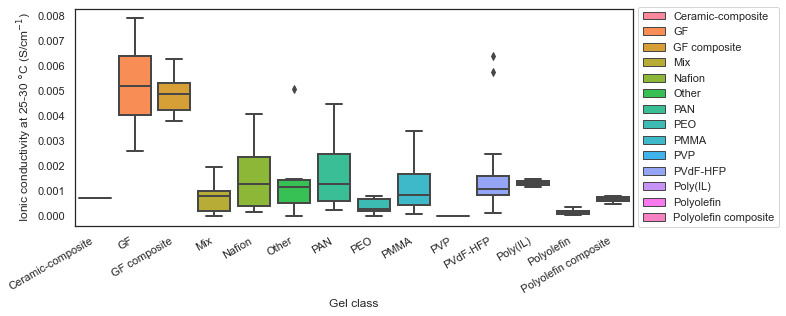

In [108]:
sns.set()
sns.set_style("white")
sns.set_context("notebook", rc={'axes.grid': True})
sns.set_palette('Set1')
plt.figure(figsize=(10, 4))

GPE_box = sns.boxplot(
                x='class', 
                y='conductivity_low_temp', 
                hue='class', 
                data=df_GPE,
                dodge=False,
                linewidth=2,
                saturation=1.5,
                ).set(
    xlabel='Gel class',
    ylabel='Ionic conductivity at 25-30 $\degree$C (S/cm$^{-1}$)',
    )
plt.xticks(
    rotation=30,
    horizontalalignment='right',
    )

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.savefig('.\FIGURES\GPE_class-vs-cond_box.svg', 
           transparent=False)

## Figure XX - Gel conductivity vs. porosity
### Caption
dfsfddfs

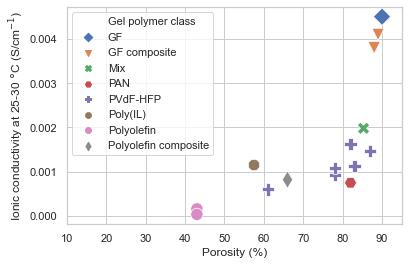

In [109]:
df_cond_por = df_GPE[['UID','class', 'porosity', 'conductivity_low_temp']]
df_cond_por.dropna(inplace=True)
df_cond_por.sort_values(by=['class'], inplace=True)

sns.set()
sns.set_style("whitegrid")
sns.set_context("notebook",rc={'axes.grid': True})
plt.figure(figsize=(6, 4))
markers = ['D', 'v', 'X', 'H', 'P', '8', 'o', 'd']

fig_cond = sns.scatterplot(
                x='porosity', 
                y='conductivity_low_temp', 
                hue='class', 
                data=df_cond_por, 
                s=150, 
                style='class', 
                markers=markers
                )

plt.xlim(10, 95)
plt.xlabel('Porosity (%)')
plt.ylabel('Ionic conductivity at 25-30 $\degree$C (S/cm$^{-1}$)')
plt.legend().texts[0].set_text("Gel polymer class")

plt.savefig('.\FIGURES\GPE_porosity-vs-conductivity.svg', 
           transparent=False)

## Figure XX - GPE tensile strength vs conductivity

### Caption
fdfdfd

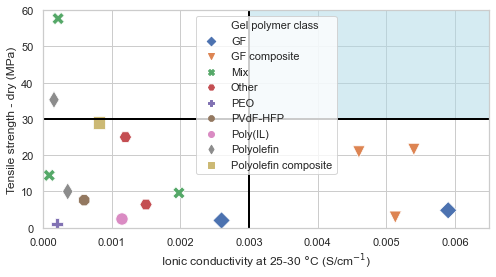

In [110]:
df_cond_strength = df_GPE[['UID','class', 'strength_tensile_dry', 'conductivity_low_temp']]
df_cond_strength.dropna(inplace=True)
df_cond_strength.sort_values(by=['class'], inplace=True)

sns.set()
sns.set_style("whitegrid")
sns.set_context("notebook",rc={'axes.grid': True})
plt.figure(figsize=(8, 4))
markers = ['D', 'v', 'X', 'H', 'P', '8', 'o', 'd', 's']

fig_cond = sns.scatterplot(
                x='conductivity_low_temp', 
                y='strength_tensile_dry', 
                hue='class', 
                data=df_cond_strength, 
                s=150, 
                style='class', 
                markers=markers
                )

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xlabel('Ionic conductivity at 25-30 $\degree$C (S/cm$^{-1}$)')
plt.ylabel('Tensile strength - dry (MPa)')
plt.legend().texts[0].set_text("Gel polymer class")
plt.xlim(0, 0.0065)
plt.ylim(0, 60)

plt.plot([0.003, 0.003], [-10, 80], linewidth=2, color='black')
plt.plot([-1, 1], [30, 30], linewidth=2, color='black')
fig_cond.add_patch(patches.Rectangle((0.003, 30), 1, 60, color='lightblue', alpha=0.5))

plt.savefig('.\FIGURES\GPE_strength-vs-conductivity.svg', 
           transparent=False)